### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainX[0:2],trainY[0:2],testX[0:2],testY[0:2]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 array([9, 0], dtype=uint8),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 array([9, 2], dtype=uint8))

In [7]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY,10)
testY = tf.keras.utils.to_categorical(testY,10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


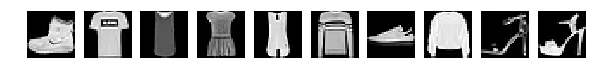

In [10]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
    # To discuss with Abhi
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

W1204 10:36:35.514873 140402743248768 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Execute the model using model.fit()

In [12]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=50, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/sample - loss: 2038.3276 - acc: 0.7387 - val_loss: 1672.1216 - val_acc: 0.7625
Epoch 2/50
60000/60000 [==============================] - 2s 38us/sample - loss: 1656.7174 - acc: 0.7776 - val_loss: 1439.3668 - val_acc: 0.7646
Epoch 3/50
60000/60000 [==============================] - 2s 38us/sample - loss: 1546.3971 - acc: 0.7857 - val_loss: 1620.4474 - val_acc: 0.7527
Epoch 4/50
60000/60000 [==============================] - 2s 39us/sample - loss: 1524.5838 - acc: 0.7903 - val_loss: 1196.5824 - val_acc: 0.7873
Epoch 5/50
60000/60000 [==============================] - 2s 38us/sample - loss: 1519.7922 - acc: 0.7915 - val_loss: 1028.8082 - val_acc: 0.8151
Epoch 6/50
60000/60000 [==============================] - 2s 39us/sample - loss: 1457.4135 - acc: 0.7951 - val_loss: 1039.9377 - val_acc: 0.8170
Epoch 7/50
60000/60000 [==============================] - 2s 38us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])




In [14]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=50, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6006 - acc: 0.7933 - val_loss: 0.5114 - val_acc: 0.8245
Epoch 2/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4896 - acc: 0.8314 - val_loss: 0.4974 - val_acc: 0.8335
Epoch 3/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4691 - acc: 0.8382 - val_loss: 0.4895 - val_acc: 0.8313
Epoch 4/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4590 - acc: 0.8422 - val_loss: 0.4744 - val_acc: 0.8366
Epoch 5/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4520 - acc: 0.8434 - val_loss: 0.4759 - val_acc: 0.8398
Epoch 6/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4436 - acc: 0.8462 - val_loss: 0.4670 - val_acc: 0.8401
Epoch 7/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4429 - acc: 0.8469 - val_loss: 0.

### Execute the model

In [0]:
# Done in above step

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=50, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.9245 - acc: 0.6815 - val_loss: 0.6811 - val_acc: 0.7693
Epoch 2/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.6441 - acc: 0.7783 - val_loss: 0.6064 - val_acc: 0.7929
Epoch 3/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5865 - acc: 0.7982 - val_loss: 0.5758 - val_acc: 0.8056
Epoch 4/50
60000/60000 [==============================] - 4s 58us/sample - loss: 0.5588 - acc: 0.8069 - val_loss: 0.5692 - val_acc: 0.8088
Epoch 5/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5409 - acc: 0.8138 - val_loss: 0.5427 - val_acc: 0.8135
Epoch 6/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5257 - acc: 0.8201 - val_loss: 0.5361 - val_acc: 0.8178
Epoch 7/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5195 - acc: 0.8209 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#First hidden layer
model.add(tf.keras.layers.Dense(100,activation = 'sigmoid'))

#Second hidden layer
model.add(tf.keras.layers.Dense(100,activation = 'sigmoid'))

#Third hidden layer
model.add(tf.keras.layers.Dense(10,activation = 'sigmoid'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.05)

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
_________________________________________________________________
Output (Dense)               (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

In [30]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=50, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/sample - loss: 1.6471 - acc: 0.4899 - val_loss: 0.9791 - val_acc: 0.7098
Epoch 2/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.8013 - acc: 0.7379 - val_loss: 0.6666 - val_acc: 0.7697
Epoch 3/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6329 - acc: 0.7739 - val_loss: 0.5839 - val_acc: 0.7893
Epoch 4/50
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5564 - acc: 0.8029 - val_loss: 0.5190 - val_acc: 0.8183
Epoch 5/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4999 - acc: 0.8293 - val_loss: 0.4739 - val_acc: 0.8377
Epoch 6/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4581 - acc: 0.8444 - val_loss: 0.4454 - val_acc: 0.8467
Epoch 7/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4293 - acc: 0.8518 - val_loss: 0.

## Review model

In [0]:
#Done above

### Run the model

In [0]:
#Done above